In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [ ]:
!ls

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('revised_nft.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      14461 non-null  int64  
 1   id                                              14461 non-null  int64  
 2   token_id                                        14461 non-null  object 
 3   name                                            13698 non-null  object 
 4   traits                                          14461 non-null  object 
 5   description                                     10469 non-null  object 
 6   is_presale                                      14461 non-null  bool   
 7   asset_contract.created_date                     14461 non-null  object 
 8   asset_contract.name                             14461 non-null  object 
 9   asset_contract.total_supply            

In [5]:
df.describe()

,Unnamed: 0,id,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,target
count,14461.000000,1.446100e+04,1328.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000
mean,7230.000000,6.189012e+07,137.871235,386.151373,136.289676,249.861697,455.793790,249.861697,0.668004
std,4174.675456,4.724710e+07,1146.537191,247.060855,247.061572,5.878692,384.439182,5.878692,0.470946
min,0.000000,1.787230e+05,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3615.000000,1.706683e+07,0.000000,250.000000,0.000000,250.000000,250.000000,250.000000,0.000000
50%,7230.000000,5.714872e+07,0.000000,250.000000,0.000000,250.000000,250.000000,250.000000,1.000000
75%,10845.000000,1.118344e+08,0.000000,500.000000,250.000000,250.000000,1000.000000,250.000000,1.000000
max,14460.000000,1.190305e+08,10333.000000,1500.000000,1250.000000,250.000000,1500.000000,250.000000,1.000000


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

#### Checking the object data type

In [7]:
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

,token_id,name,traits,description,asset_contract.created_date,asset_contract.name,asset_contract.symbol,asset_contract.schema_name,asset_contract.asset_contract_type,asset_contract.nft_version,asset_contract.opensea_version,collection.created_date,collection.slug,collection.safelist_request_status,collection.description,collection.external_url,collection.image_url,collection.twitter_username,collection.instagram_username,collection.medium_username,collection.chat_url,creator.user.username,owner.address
count,14461,13698,14461,10469,14461,14461,13151,14461,14461,4734,7888,14461,14461,14461,12598,8240,13417,10905,3220,2118,1,12092,14461
unique,14461,11118,6723,8114,453,433,400,3,2,3,1,2164,2171,4,1723,956,1840,1203,668,139,1,2095,4085
top,1,Clayton Kershaw,[],The Toy Boogers collection is 100% handmade an...,2020-12-02 17:40:53.232025,OpenSea Collection,OPENSTORE,ERC1155,semi-fungible,3.0,2.0.0,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,The Los Angeles Dodgers and Lucid Sight are pr...,https://www.mlbc.app/dodgers,https://lh3.googleusercontent.com/bxTDkUWAgD_I...,MLBChampions,parallel_nft,rarible,https://discord.gg/FpN2ws6,0x3ee5c5f600a019a68a43c61e5966e0b3e8c6ce71,0x0000000000000000000000000000000000000000
freq,1,877,7073,126,7885,7885,7888,9729,9729,4680,7888,2426,2426,9918,2426,2426,2426,2426,170,1001,1,2433,9745


#### Baseline Understanding 

In [8]:
df['target'].value_counts(normalize=True)

1    0.668004
0    0.331996
Name: target, dtype: float64

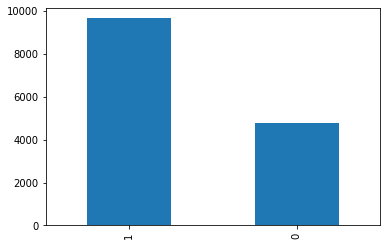

In [9]:
df['target'].value_counts().plot(kind='bar');

In [ ]:
# dropped the null values of the object type and token_id and the traits cos there is no standard 
# traits for each of this token.

In [11]:
df_obj = df.select_dtypes('object').dropna(axis=1)

In [14]:
df_obj.drop(['token_id', 'traits'], axis=1, inplace=True)

In [16]:
nft_df = pd.concat([df_obj, df.select_dtypes(['int64', 'float64', 'bool'])], axis=1)

In [18]:
nft_df.shape

(14461, 18)

<!--  -->

##### some attempts in Fixing missing Values

In [ ]:
# int_att = [num for num in X_train.columns if X_train[num].dtypes not in ['O', 'bool']]

In [ ]:
# bool_attribute = [bol for bol in X_train.columns if X_train[bol].dtypes == 'bool']
# date_att = [time for time in X_train.columns if X_train[time].dtypes == 'O' and 'date' in time]
# cat_att = [obj for obj in X_train.columns if X_train[obj].dtypes == 'O' and obj not in date_att]

# # print(f"Boolean = {bool_attribute} \n")
# print(f"Integer = {int_att} \n")
# print(f"Time = {date_att} \n")
# print(f"Object = {cat_att} \n")

In [ ]:
# Now lets check for numerical variables the contains missing values
# numerical_with_nan=[num for num in int_att if X_train[num].isnull().sum() > 1 ]
## We will print the numerical nan variables and percentage of missing values

# for feature in numerical_with_nan:
#     print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))


In [ ]:
# Replacing the numerical Missing Values

# for feature in numerical_with_nan:
#     ## We will replace by using median since there are outliers
#     median_value=X_train[feature].median()
    
#     ## 
# create a new feature to capture nan values
#     X_train[feature+'nan']=np.where(X_train[feature].isnull(),1,0)
#     X_train[feature].fillna(median_value,inplace=True)
    
# X_train[numerical_with_nan].isnull().sum()

#### Categorical Variable

In [ ]:
# features_nan=[feature for feature in cat_att if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes=='O']

# for feature in features_nan:
#     print("{}: {}% missing values".format(feature,np.round(X_train[feature].isnull().mean(),4)))

In [ ]:
# def replace_cat_feature(dataset,features_nan):
#     data=df.copy()
#     data[features_nan]=data[features_nan].fillna('Missing')
#     return data

# X_train=replace_cat_feature(X_train,features_nan)

# X_train[features_nan].isnull().sum()

### Boolean variable

In [ ]:
# for column in bool_attribute:
#     X_train[column] = np.where(X_train[column] == True, 1, 0)

#### Numerical Variable

In [ ]:
# for x in int_att:
#     print(f"*********** {x} ***********")
#     print(X_train[x].value_counts())
#     print("\n\n")

###  Train test split

In [19]:
X = nft_df.drop('target', axis=1)
y = nft_df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [71]:
X_train.head(12)

,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address,id,is_presale,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.featured,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points
1791,2020-05-27 16:53:32.834583,Rarible 1155,ERC1155,semi-fungible,2020-01-01 13:22:57.777065,rarible,approved,0x0000000000000000000000000000000000000000,21459482,False,NaN,250,0,250,False,0,250
8067,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-20 22:00:44.082162,untitled-collection-15155546,not_requested,0x0000000000000000000000000000000000000000,111823746,True,NaN,250,0,250,False,0,250
9839,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 07:31:31.489277,donald-trump-andy-warhol-style,not_requested,0x0000000000000000000000000000000000000000,111833724,True,NaN,250,0,250,False,1000,250
6886,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xcb32569a5ede5bcacaca7038ea9fbbad7c348895,1702118,False,NaN,500,250,250,False,250,250
3891,2018-09-25 09:54:55.173827,Hero,ERC721,non-fungible,2019-04-26 22:13:15.518921,hero,not_requested,0xd5768cb94634dea639f32078c4e82b5161a081fc,1715526,False,NaN,250,0,250,False,0,250
944,2020-10-12 16:25:20.228951,dontrug.me,ERC1155,semi-fungible,2020-10-12 16:32:31.348076,dontrug-me,verified,0x0000000000000000000000000000000000000000,60449553,False,NaN,1250,1000,250,False,1000,250
8868,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 23:02:20.969452,secretcastle,not_requested,0x0000000000000000000000000000000000000000,111827961,True,NaN,250,0,250,False,800,250
4829,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0x0172b9d9328da423cc9057fb264e7b309fcba797,1704567,False,NaN,500,250,250,False,250,250
5358,2018-09-20 03:42:04.658841,Dodgers MLB Crypto,ERC721,non-fungible,2019-04-26 22:13:24.304778,dodgers-mlb-crypto,not_requested,0xf302a0d506087cb6393ec1a97b0e69f47c3bcee5,1703958,False,NaN,500,250,250,False,250,250
875,2021-09-17 15:06:09.145889,AnimightiesJigScene,ERC1155,semi-fungible,2021-09-17 15:45:24.579657,animightiesjigscene,not_requested,0x0000000000000000000000000000000000000000,53941850,False,NaN,750,500,250,False,500,250


In [ ]:
X_train.select_dtypes('int64')

In [22]:
# converting the numerical variable
nft_impute = SimpleImputer(strategy='median')
x_train_int = nft_impute.fit_transform(X_train.select_dtypes(['int64', 'float64']))

In [23]:
nft_int_conv = pd.DataFrame(x_train_int, columns=X_train.select_dtypes(['int64', 'float64']).columns)

In [25]:
nft_int_conv.nunique()

id                                                12291
asset_contract.total_supply                          21
asset_contract.seller_fee_basis_points               24
asset_contract.dev_seller_fee_basis_points           24
asset_contract.opensea_seller_fee_basis_points        2
collection.dev_seller_fee_basis_points               46
collection.opensea_seller_fee_basis_points            2
dtype: int64

In [24]:
# doing the same for the object
X_train.select_dtypes('object').isna().sum()

asset_contract.created_date           0
asset_contract.name                   0
asset_contract.schema_name            0
asset_contract.asset_contract_type    0
collection.created_date               0
collection.slug                       0
collection.safelist_request_status    0
owner.address                         0
dtype: int64

In [26]:
from sklearn.preprocessing import OrdinalEncoder


In [39]:
ordinal_obj = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=9999)
transformed_obj = ordinal_obj.fit_transform(X_train.select_dtypes('object'))

In [40]:
nft_or_encode = pd.DataFrame(transformed_obj, columns=X_train.select_dtypes('object').columns)

#### Joining the numerical and Object together for the X_train

In [41]:
conv_nft_df = pd.concat([nft_int_conv, nft_or_encode], axis=1)

In [42]:
conv_nft_df.head()

,id,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
0,21459482.0,0.0,250.0,0.0,250.0,0.0,250.0,32.0,280.0,1.0,1.0,31.0,1243.0,0.0,0.0
1,111823746.0,0.0,250.0,0.0,250.0,0.0,250.0,51.0,242.0,1.0,1.0,1573.0,1796.0,1.0,0.0
2,111833724.0,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1590.0,512.0,1.0,0.0
3,1702118.0,0.0,500.0,250.0,250.0,250.0,250.0,11.0,100.0,2.0,0.0,20.0,501.0,1.0,2806.0
4,1715526.0,0.0,250.0,0.0,250.0,0.0,250.0,12.0,160.0,2.0,0.0,14.0,739.0,1.0,2948.0


In [ ]:
# conv_nft_df = conv_nft_df.drop('Unnamed: 0', axis = 1)

In [ ]:
# conv_nft_df

#### Convert Test Data

In [ ]:
# Doing the same preprocessing to the test data

In [32]:
x_test_int = nft_impute.transform(X_test.select_dtypes(['int64', 'float64']))

In [33]:
nft_int_conv_test = pd.DataFrame(x_test_int, columns=X_test.select_dtypes(['int64', 'float64']).columns)

In [34]:
X_test.select_dtypes('object').isna().sum()
X_test.nunique()

asset_contract.created_date                        147
asset_contract.name                                143
asset_contract.schema_name                           2
asset_contract.asset_contract_type                   2
collection.created_date                            646
collection.slug                                    647
collection.safelist_request_status                   4
owner.address                                      652
id                                                2170
is_presale                                           2
asset_contract.total_supply                         13
asset_contract.seller_fee_basis_points              18
asset_contract.dev_seller_fee_basis_points          18
asset_contract.opensea_seller_fee_basis_points       2
collection.featured                                  2
collection.dev_seller_fee_basis_points              31
collection.opensea_seller_fee_basis_points           2
dtype: int64

In [36]:
X_test.select_dtypes('object').head()

,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
2900,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-08-18 21:21:25.521115,the-animal-kingdom-collection,not_requested,0x0000000000000000000000000000000000000000
13523,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-13 11:12:11.848650,talicard,not_requested,0x0000000000000000000000000000000000000000
10043,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-22 01:46:01.894371,ulyssessgrant,not_requested,0x0000000000000000000000000000000000000000
7900,2020-12-02 17:40:53.232025,OpenSea Collection,ERC1155,semi-fungible,2021-11-21 07:31:31.489277,donald-trump-andy-warhol-style,not_requested,0x0000000000000000000000000000000000000000
3479,2020-05-27 16:53:32.834583,Rarible 1155,ERC1155,semi-fungible,2020-01-01 13:22:57.777065,rarible,approved,0x0000000000000000000000000000000000000000


In [43]:
test_transformed_obj = ordinal_obj.transform(X_test.select_dtypes('object'))
test_nft_or_encode = pd.DataFrame(test_transformed_obj, columns=X_test.select_dtypes('object').columns)

In [44]:
test_nft_df = pd.concat([nft_int_conv_test, test_nft_or_encode], axis=1)

In [45]:
test_nft_df.head()

,id,asset_contract.total_supply,asset_contract.seller_fee_basis_points,asset_contract.dev_seller_fee_basis_points,asset_contract.opensea_seller_fee_basis_points,collection.dev_seller_fee_basis_points,collection.opensea_seller_fee_basis_points,asset_contract.created_date,asset_contract.name,asset_contract.schema_name,asset_contract.asset_contract_type,collection.created_date,collection.slug,collection.safelist_request_status,owner.address
0,66705018.0,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,831.0,1492.0,1.0,0.0
1,117641833.0,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1419.0,1468.0,1.0,0.0
2,111834801.0,0.0,250.0,0.0,250.0,500.0,250.0,51.0,242.0,1.0,1.0,1722.0,1631.0,1.0,0.0
3,111821802.0,0.0,250.0,0.0,250.0,1000.0,250.0,51.0,242.0,1.0,1.0,1590.0,512.0,1.0,0.0
4,16633788.0,0.0,250.0,0.0,250.0,0.0,250.0,32.0,280.0,1.0,1.0,31.0,1243.0,0.0,0.0


### Functions for Models and important features

In [51]:
from sklearn.model_selection import cross_val_score

In [72]:
# import important features 
def plot_feature_imp(estimator, X):
    '''
    Plot feature importance of model
    
    Parameters
    ----------
    estimator : estimator object
        This is assumed to implement the scikit-learn estimator interface.
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples
        
        
    Output
    ------
    - Prints plot of features in order of importance
    
    '''
    
    feats = estimator.feature_importances_
    feature_imps = dict(zip(X.columns, feats))

    # creating list of column names
    feat_names=list(X.columns)

    # Sort feature importances in descending order
    indices = np.argsort(feats)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [feat_names[i] for i in indices]

    # Create plot
    plt.figure(figsize = [16,6])

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X.shape[1]), feats[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X.shape[1]), names, rotation=50, ha = 'right')

    # Show plot
    plt.show()

In [69]:
def evaluate(estimator, X_tr, y_tr):
    '''
    This is to evalute the best models and outputs are the metrics and matrix
    estimator: model,
    X_tr: X_train,
    X_h_te: X_hold_test,
    y_tr: y_training set,
    y_h_te: y_hold_test
    '''
#    predicts the models
    tr_preds = estimator.predict(X_tr)

    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train recall: {recall_score(y_tr, tr_preds)}")
    print("*" * 10)


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
nft_tree = DecisionTreeClassifier(random_state=42)

In [48]:
nft_tree.fit(conv_nft_df, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
cross_val_score(nft_tree, conv_nft_df, y_train, cv=5)

array([0.94265962, 0.93938161, 0.93653377, 0.93897478, 0.94222945])

In [49]:
nft_tree.score(test_nft_df, y_test)

0.9336405529953917

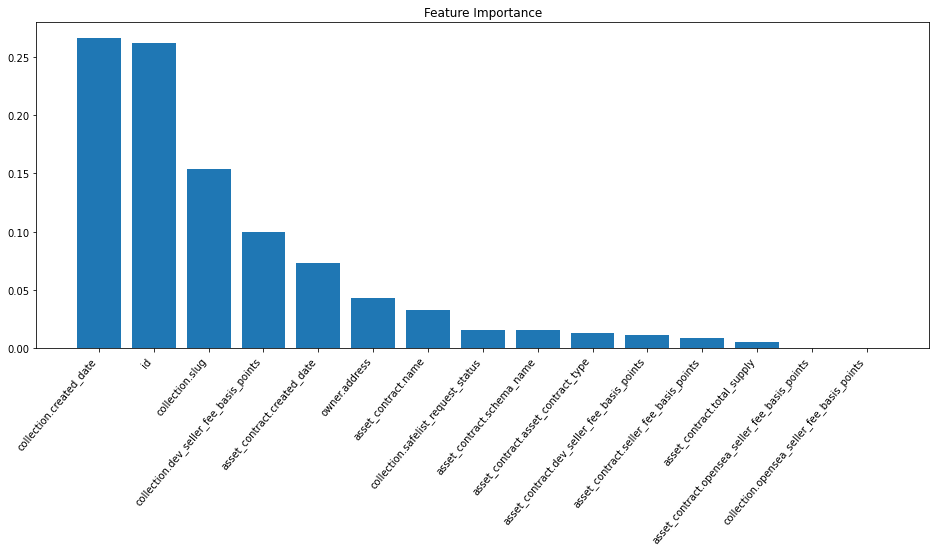

In [79]:
plot_feature_imp(gs_rand_forest.best_estimator_, conv_nft_df)

### Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
nft_rand = RandomForestClassifier(random_state=42)
nft_rand.fit(conv_nft_df, y_train)

RandomForestClassifier(random_state=42)

In [55]:
cross_val_score(nft_rand, conv_nft_df, y_train, cv=5)

array([0.95038634, 0.95524817, 0.9544345 , 0.94426363, 0.94833198])

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
params_nft ={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rand_forest=RandomizedSearchCV(estimator= nft_rand,
               param_distributions= params_nft,
               cv=5)

gs_rand_forest.fit(conv_nft_df, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [20, 40, 50, 60],
                                        'n_estimators': [100, 200, 400]})

In [59]:
cross_val_score(gs_rand_forest.best_estimator_, conv_nft_df, y_train, cv=5)

array([0.95038634, 0.95524817, 0.9544345 , 0.94426363, 0.94833198])

In [60]:
gs_rand_forest.best_estimator_.score(test_nft_df, y_test)

0.9552995391705069

In [78]:
evaluate(gs_rand_forest.best_estimator_, conv_nft_df, y_train)

Training Scores:
Train Accuracy: 0.9999186396550321
Train precision: 1.0
Train recall: 0.9998781379478431
**********


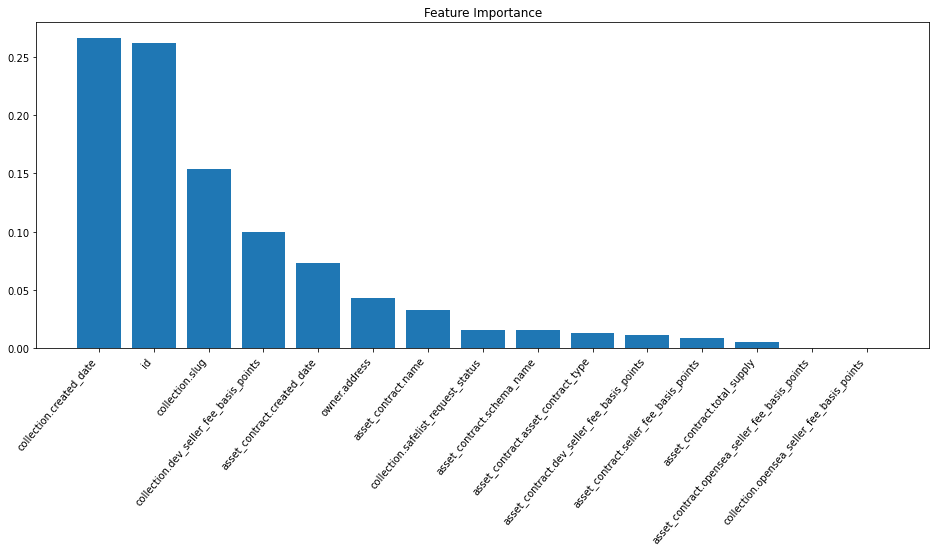

In [74]:
plot_feature_imp(gs_rand_forest.best_estimator_, conv_nft_df)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
logit_nft = LogisticRegression()
params_logit = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'max_iter': [100, 1000],
    'solver': ['sag', 'lbfgs']
}
cv = GridSearchCV(logit_nft, param_grid=params_logit)

cv.fit(conv_nft_df, y_train)

/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mac/opt/anaconda3/envs/project_nft/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 1000], 'solver': ['sag', 'lbfgs']})

In [77]:
cross_val_score(cv.best_estimator_, conv_nft_df, y_train, cv=5)

array([0.33224888, 0.33238405, 0.33238405, 0.33238405, 0.77990236])

### Save model

In [85]:
import pickle

# save the model to disk
model_name = 'models/real_model.sav'
pickle.dump(gs_rand_forest.best_estimator_, open(model_name, 'w'))

FileNotFoundError: [Errno 2] No such file or directory: 'models/real_model.sav'